Yaprak Sınıflandırması
Gerekli Kütüphanelerin Eklenmesi

In [177]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


Test ve Eğitim Verilerinin Okunması


In [178]:
train=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta8/yaprakveriseti/train.csv")
test=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta8/yaprakveriseti/test.csv")

Sınıfların Belirlenmesi ve Etiketlenmesi


In [179]:
label_encoder=LabelEncoder().fit(train.species)
labels=label_encoder.transform(train.species)
classes =list(label_encoder.classes_)

Verilerin Hazırlanması , Özellik ve Sınıf Sayısının Belirlenmesi 

In [180]:
train=train.drop(["id","species"],axis=1)
test=test.drop(["id"],axis=1)
nb_features=192
nb_classes=len(classes)

Eğitim Verilerinin Standartlaştırılması

In [181]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(train.values)
train=scaler.transform(train.values)

Eğitim Verisinin Eğitim ve Doğrulama İçin Ayarlanması

In [182]:
from sklearn.model_selection import train_test_split
x_train , x_valid , y_train , y_valid = train_test_split(train, labels ,test_size=0.1)

Etiketlerin kategorileştirilmesi


In [183]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)

x_train=np.array(x_train).reshape(891,192,1)
x_valid=np.array(x_valid).reshape(99,192,1)

Modelin oluşturulması 


In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Conv1D,Dropout,MaxPooling1D,Flatten

model=Sequential()
model.add(Conv1D(512,1,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(256,1))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(nb_classes,activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 192, 512)          1024      
                                                                 
 activation_12 (Activation)  (None, 192, 512)          0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 96, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 96, 256)           131328    
                                                                 
 activation_13 (Activation)  (None, 96, 256)           0         
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 48, 256)          0         
 g1D)                                                 

Ağın Derlenmesi

In [185]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Modelin Eğitilmesi


In [186]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_valid,y_valid))

Epoch 1/5
28/28 [==============================] - 38s 875ms/step - loss: 3.7721 - accuracy: 0.1796 - val_loss: 1.6866 - val_accuracy: 0.5354
Epoch 2/5
28/28 [==============================] - 13s 474ms/step - loss: 0.8915 - accuracy: 0.7666 - val_loss: 0.5746 - val_accuracy: 0.8586
Epoch 3/5
28/28 [==============================] - 13s 453ms/step - loss: 0.4338 - accuracy: 0.8866 - val_loss: 0.7208 - val_accuracy: 0.8687
Epoch 4/5
28/28 [==============================] - 20s 708ms/step - loss: 0.2051 - accuracy: 0.9439 - val_loss: 0.4478 - val_accuracy: 0.8889
Epoch 5/5
28/28 [==============================] - 22s 768ms/step - loss: 0.2110 - accuracy: 0.9416 - val_loss: 0.6004 - val_accuracy: 0.8485


Ortalama Değerlerin Gösterilmesi


In [187]:
#accuracy yerine f1score, kesinlik(precision) , duyarlılık(sensivity) ve özgüllük(specificity)

In [188]:
print(("Ortalama Eğitim Kaybı: ",np.mean(model.history.history["loss"])))
print(("Ortalama Eğitim Başarımı: ",np.mean(model.history.history["accuracy"])))
print(("Ortalama Doğrulama Kaybı: ",np.mean(model.history.history["val_loss"])))
print(("Ortalama Doğrulama Başarımı: ",np.mean(model.history.history["val_accuracy"])))

('Ortalama Eğitim Kaybı: ', 1.1026899099349976)
('Ortalama Eğitim Başarımı: ', 0.7436588108539581)
('Ortalama Doğrulama Kaybı: ', 0.8060331583023072)
('Ortalama Doğrulama Başarımı: ', 0.8)


Değerlerin grafik üzerinde gösterilmesi



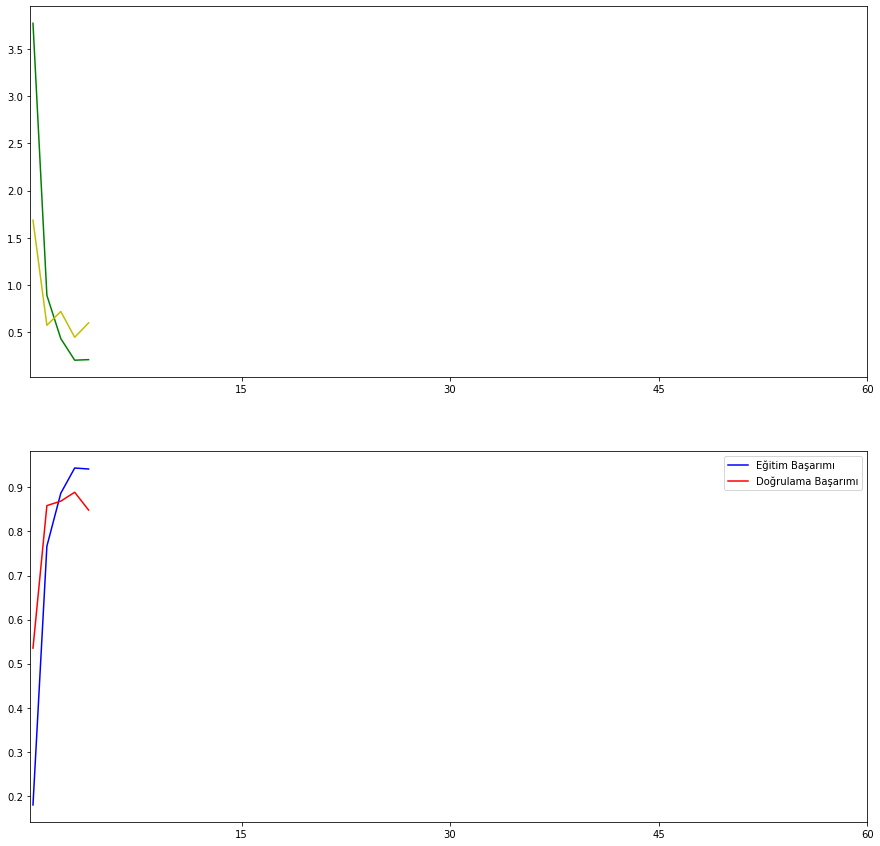

In [189]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,15))
ax1.plot(model.history.history['loss'],color='g',label="Eğitim Kaybı")
ax1.plot(model.history.history['val_loss'],color='y',label="Doğrulama kaybı")
ax1.set_xticks(np.arange(15,75,15))
ax2.plot(model.history.history['accuracy'],color='b',label="Eğitim Başarımı")
ax2.plot(model.history.history['val_accuracy'],color='r',label="Doğrulama Başarımı")
ax2.set_xticks(np.arange(15,75,15))
plt.legend()
plt.show()